In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("dataset.csv",nrows=10000)

In [3]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
data.shape

(10000, 35)

In [5]:
data.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [6]:
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [7]:
data1=data.dropna(how="any",axis=0)
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [8]:
data1["classification"].value_counts()

benign     7000
malware    3000
Name: classification, dtype: int64

In [9]:
data1['classification'] = data1.classification.map({'benign':0, 'malware':1})

In [10]:
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [11]:
data1.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
9995,com.vbsmojivy.mianzed.apk,995,0,1036288,0,3069939712,30736,0,0,0,...,141,0,114,8,3204448256,420668,5,4,0,0
9996,com.vbsmojivy.mianzed.apk,996,0,0,0,3069939712,30736,0,0,0,...,141,0,114,8,3204448256,420669,5,4,0,0
9997,com.vbsmojivy.mianzed.apk,997,0,0,0,3069939712,30736,0,0,0,...,141,130,114,8,3204448256,420668,5,4,0,0
9998,com.vbsmojivy.mianzed.apk,998,0,0,0,3069939712,30736,0,0,0,...,141,0,114,8,3204448256,420670,5,4,0,0
9999,com.vbsmojivy.mianzed.apk,999,0,0,0,3069939712,30736,0,0,0,...,141,0,114,8,3204448256,420670,5,4,0,0


C:\Users\jayac\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


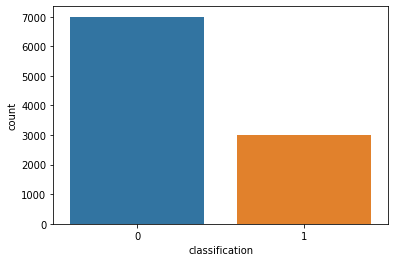

In [12]:
sns.countplot(data1["classification"])
plt.show()

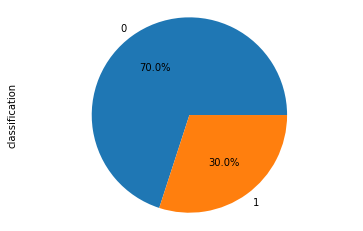

In [13]:
data1["classification"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [14]:
benign1=data.loc[data['classification']=='benign']
benign1["classification"].head()

1000    benign
1001    benign
1002    benign
1003    benign
1004    benign
Name: classification, dtype: object

In [15]:
malware1=data.loc[data['classification']=='malware']
malware1["classification"].head()

0    malware
1    malware
2    malware
3    malware
4    malware
Name: classification, dtype: object

In [16]:
corr=data1.corr()
corr.nlargest(35,'classification')["classification"]

classification       1.000000e+00
free_area_cache      7.515455e-01
last_interval        2.743469e-01
reserved_vm          2.410752e-01
mm_users             1.501062e-01
stime                1.456021e-01
prio                 1.264780e-01
total_vm             1.952861e-02
min_flt              1.598506e-02
millisecond          2.363328e-18
gtime               -4.580519e-02
state               -7.070808e-02
exec_vm             -8.102718e-02
nivcsw              -1.673408e-01
map_count           -2.434112e-01
fs_excl_counter     -2.760674e-01
static_prio         -2.948463e-01
utime               -3.076102e-01
nvcsw               -3.086750e-01
vm_truncate_count   -3.405487e-01
shared_vm           -4.596174e-01
end_data            -4.596174e-01
maj_flt             -4.596174e-01
Name: classification, dtype: float64

In [17]:
x=data1.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,task_size,cached_hole_size,...,end_data,last_interval,nivcsw,min_flt,fs_excl_counter,lock,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0


In [18]:
y=data1["classification"]
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: classification, Length: 10000, dtype: int64

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from lib.utils import *

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
ac=[]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test,sample_weight=0.2)*100)

In [22]:

from sklearn.cluster import KMeans
mod = KMeans(n_clusters=2, random_state=0, n_init="auto")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
ac.append(accuracy_score(model,y_test,sample_weight=0.7)*100)

In [23]:
import pickle
f=open('model.pkl','rb')
model=pickle.load(f)
y_pred=model.predict(X_test)

In [24]:
result=pd.DataFrame({
    "Actual_Value":y_test[:10],
    "Predict_Value":y_pred[:10]
})

In [25]:
result

,Actual_Value,Predict_Value
9953,0,0
3850,1,1
4962,0,0
3886,1,1
5437,1,0
8517,0,0
2041,0,0
1989,0,0
1933,0,0
9984,0,0


In [26]:
for i in range(1,10):
    if(y_pred[i]==0):
        print("normal")
    else:
        print("anomoly detected")

anomoly detected
normal
anomoly detected
normal
normal
normal
normal
normal
normal


the accuracy of Kmeans is 95.98 and KNN is 95.72


C:\Users\jayac\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(50.0, 100.0)

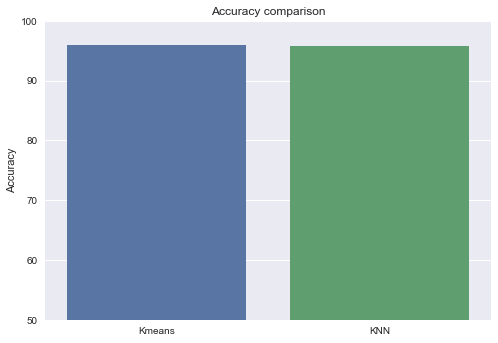

In [27]:

import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('seaborn')
x=['Kmeans','KNN']
ac.reverse()
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)